<a href="https://colab.research.google.com/github/mgoetze06/fotobooth/blob/main/cvml/fotobox-cvml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
#from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import math
import os
import random

#convert to script:
#jupyter nbconvert --to script *.ipynb

# Face Frontal Classifier

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#face_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_frontalface_alt2.xml')
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


(2592, 3888, 3)
(864, 1296, 3)


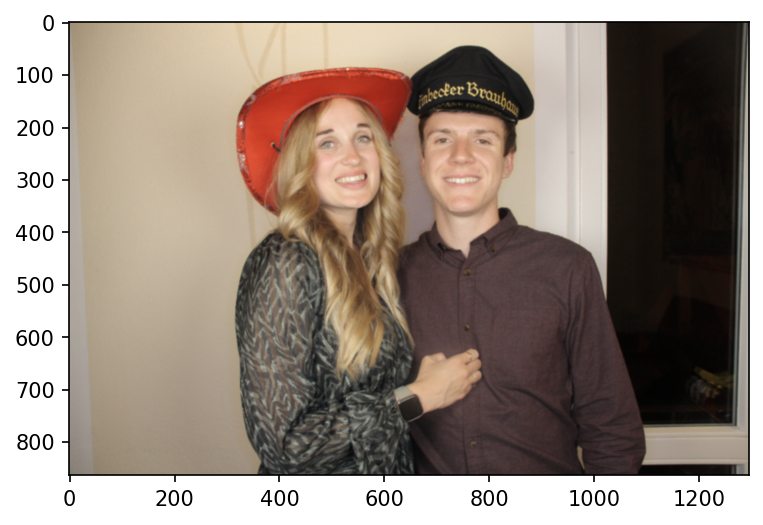

In [ ]:
#cap = cv2.VideoCapture(0)
#img = cv2.imread('/content/drive/MyDrive/test.JPG', cv2.IMREAD_GRAYSCALE)
#org_img = cv2.imread('/content/drive/MyDrive/test.JPG')
#org_img = cv2.imread('/content/drive/MyDrive/cvml-emb/test_gruppe.jpg')
#org_img = cv2.imread('test_gruppe.jpg')
org_img = cv2.imread('test_gesicht3.jpg')
h_org,w_org,temp = org_img.shape
print(org_img.shape)
reduce_factor = 3
img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
img = cv2.GaussianBlur(img, (5,5), 0)
#img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
#cv2.imshow('image',img) not available in jupyter
#plt.imshow(img, cmap='gray')
plt.figure(figsize=(6, 4), dpi=150)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

In [ ]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#face_boxes = face_cas.detectMultiScale(im_gray, scaleFactor=1.05, minNeighbors=9)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.2, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.15, minNeighbors=20, outputRejectLevels=True)
face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.01, minNeighbors=15, outputRejectLevels=True)
print(face_boxes)
print(rejectLevels)
print(levelWeights)

[[441 158 184 184]
 [658 160 187 187]
 [559 803  54  54]
 [327 700  52  52]
 [684 329 100 100]]
[25 25 25 25 25]
[9.80280505 7.14186205 3.88885107 3.53572996 1.36891517]


True

<Figure size 432x288 with 0 Axes>

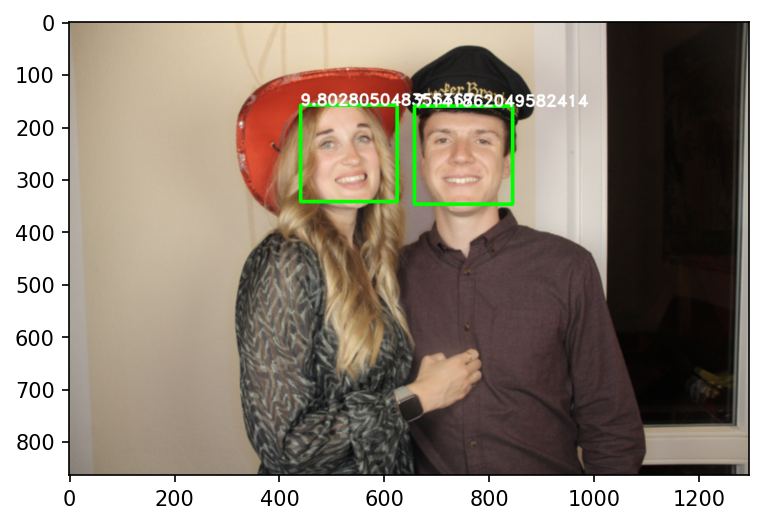

In [ ]:
score_val = 5
i = 0
plt.clf()
faces = 0
for (x, y, w, h) in face_boxes:
  if (levelWeights[i]>score_val):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
    #cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(img,str(levelWeights[i]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    faces = faces + 1
  i = i + 1
plt.figure(figsize=(6, 4), dpi=150)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')
cv2.imwrite("face_detected.jpg", img)


#plt.savefig('test_detected.jpg')
#cv2.imshow('Output', img)
#cap.release()
#cv2.destroyAllWindows()

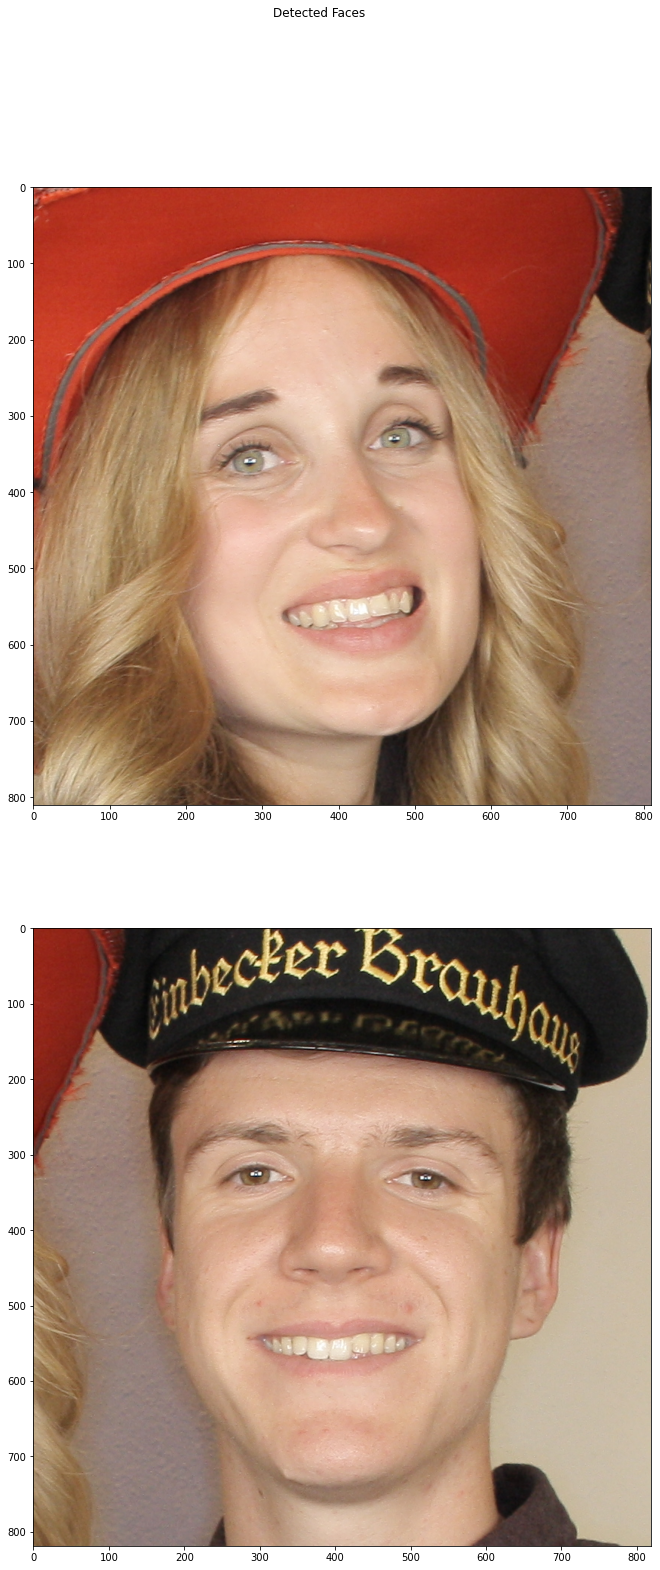

In [ ]:
i = 0
#plt.figure(figsize=(4, 8), dpi=150)
fig,axs = plt.subplots(faces,figsize=(25,25))
axs_index = 0
fig.suptitle('Detected Faces')
for face_box in face_boxes:
  if (levelWeights[i]>score_val):
    x, y, w_box, h_box = face_box*reduce_factor
    #h_org of original image
    #w_org of original image
    #print(x, y, w_box, h_box)
    crop_padding = int(h_org/20) #crop border is 1/15 of the orig. image height
    x = x - crop_padding
    y = y - crop_padding
    if x <= 0:
      x = 0
    if y <= 0:
      y = 0

    #create size of face box with padding
    w_box = w_box + 2*crop_padding
    h_box = h_box + 2*crop_padding

    #if face is near edge --> cropped image is moved from edge away
    if (x + w_box) >= w_org:
      x = w_org - w_box
    if (y + h_box) >= h_org:
      y = h_org - h_box

    #print(x, y, w_box, h_box)
    cropped_img = org_img[y:y+h_box, x:x+w_box]

    #plt.imshow(cropped_img)
    new_cropped_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB)
    filename = "face%s.jpg"%(axs_index)
    cv2.imwrite(filename, cropped_img)
    axs[axs_index].imshow(new_cropped_img)

    axs_index = axs_index+1
  i = i+1


In [ ]:
def detectFaces(img,fileCount):
    face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    ### given an image object, returns the locations of the faces
    org_img = cv2.imread(img)
    name = img[-12:-4]
    h_org,w_org,temp = org_img.shape
    print(org_img.shape)
    reduce_factor = 3
    img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
    img = cv2.GaussianBlur(img, (5,5), 0)
    #img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
    #cv2.imshow('image',img) not available in jupyter
    #plt.imshow(img, cmap='gray')
    #plt.figure(figsize=(6, 4), dpi=150)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    #print(img.shape)
    im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #face_boxes = face_cas.detectMultiScale(im_gray, scaleFactor=1.05, minNeighbors=9)
    #face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=9, outputRejectLevels=True)
    #face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.2, minNeighbors=9, outputRejectLevels=True)
    #face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.15, minNeighbors=20, outputRejectLevels=True)
    face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=5, outputRejectLevels=True)
    #print(face_boxes)
    #print(rejectLevels)
    #print(levelWeights)
    score_val = 6.5
    i = 0
    #plt.clf()
    faces = 0
    for (x, y, w, h) in face_boxes:
      if (levelWeights[i]>score_val):
        #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
        #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
        #cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
        #cv2.putText(img,str(levelWeights[i]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
        faces = faces + 1
      i = i + 1
    #plt.figure(figsize=(6, 4), dpi=150)
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #plt.imshow(img, cmap='gray')
    #cv2.imwrite("face_detected.jpg", img)
    i = 0
    #plt.figure(figsize=(4, 8), dpi=150)
    #fig,axs = plt.subplots(faces,figsize=(25,25))
    fileCount = fileCount + 1
    faceindex = 0
    #fig.suptitle('Detected Faces')
    for face_box in face_boxes:
      if (levelWeights[i]>score_val):
        x, y, w_box, h_box = face_box*reduce_factor
        #h_org of original image
        #w_org of original image
        #print(x, y, w_box, h_box)
        crop_padding = int(h_org/20) #crop border is 1/15 of the orig. image height
        x = x - crop_padding
        y = y - crop_padding
        if x <= 0:
          x = 0
        if y <= 0:
          y = 0

        #create size of face box with padding
        w_box = w_box + 2*crop_padding
        h_box = h_box + 2*crop_padding

        #if face is near edge --> cropped image is moved from edge away
        if (x + w_box) >= w_org:
          x = w_org - w_box
        if (y + h_box) >= h_org:
          y = h_org - h_box

        #print(x, y, w_box, h_box)
        cropped_img = org_img[y:y+h_box, x:x+w_box]

        #plt.imshow(cropped_img)
        #new_cropped_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB)
        filename = "faces/%s_face%s.jpg"%(name,faceindex)
        cv2.imwrite(filename, cropped_img)
        #axs[axs_index].imshow(new_cropped_img)

        faceindex = faceindex+1
      i = i+1

    

In [ ]:
def listImagesInDir(path):
    return len(glob.glob(path))
    

In [ ]:
import glob
images = glob.glob("training_data/*JPG")
print(images)

for image in images:
    totalfaces = listImagesInDir("faces/*.jpg")
    #print(image[-12:-4])

    detectFaces(image,totalfaces)


['training_data\\IMG_3926.JPG', 'training_data\\IMG_3942.JPG', 'training_data\\IMG_3944.JPG', 'training_data\\test_gesicht.JPG', 'training_data\\test_gesicht2.JPG', 'training_data\\test_gesicht3.JPG']
(2592, 3888, 3)
(2592, 3888, 3)
(2592, 3888, 3)
(2592, 3888, 3)
(2592, 3888, 3)
(2592, 3888, 3)


TODO: Create directories for good and bad classified images. Process handling (face detection in seperate process, camera, lights ...)

**Smile Classifier**

In [ ]:
#smile_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_smile.xml')
smile_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [ ]:
img = cv2.imread('face0.jpg')

In [ ]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
smile_boxes,rejectLevels, levelWeights = smile_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=40, outputRejectLevels=True)
if (len(smile_boxes)<1):
  print("why no smile?")
else:
    print(np.argmax(levelWeights))
    print(smile_boxes)
    print(rejectLevels)
    print(levelWeights)


8
[[ 52 564  72  36]
 [116 617  47  24]
 [369 441 103  52]
 [691 604  82  41]
 [309  55  95  47]
 [611 409  75  37]
 [295 220 129  65]
 [351 288  74  37]
 [297 517 252 126]
 [ 55 237 210 105]
 [172 486 177  88]
 [214 356 121  60]
 [693 743  91  46]
 [287 713 124  62]
 [428 316 112  56]
 [683 532  66  33]
 [581 358  76  38]
 [487 372 107  53]]
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
[ 3.10686631  2.58480827  2.37202734  0.78671545  2.30246222  1.81336402
  1.12613351  1.55130803  5.16170594  1.3807219   1.61287324  2.34799946
  0.82762243  1.55407724  1.80428768  2.41659638  1.33428334 -0.06249687]


In [ ]:
#for (x, y, w, h) in smile_boxes:
  #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    
(x, y, w, h) = smile_boxes[np.argmax(levelWeights)]
_ = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)

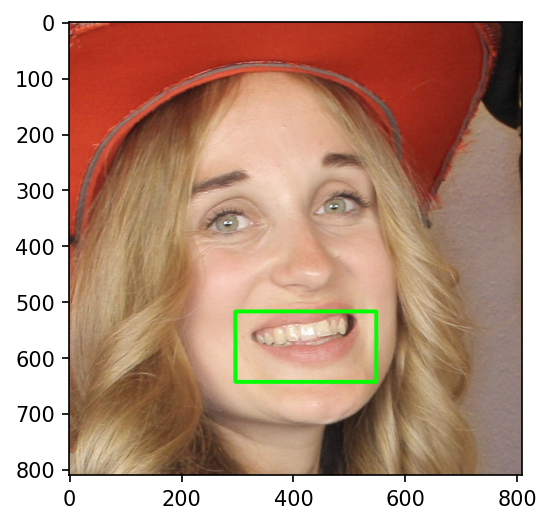

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

Create own cascade classifier. Multiple objects (special glasses, hats etc used in fotobooth) 
Somehow it would be cool to detect these objects because they are significantly shown on screen (in relation to the face. Face is covered by glasses. --> no face detection but detection of glasses could work)


# Gesture Detection

In [ ]:
#code from: https://techvidvan.com/tutorials/hand-gesture-recognition-tensorflow-opencv/

#pip install opencv-python
#pip install mediapipe
#pip install tensorflow
#https://techvidvan.s3.amazonaws.com/machine-learning-projects/hand-gesture-recognition-code.zip

# import necessary packages for hand gesture recognition project using Python OpenCV
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.8)
mpDraw = mp.solutions.drawing_utils

In [ ]:
# Load the gesture recognizer model

model = load_model('hand-gesture-recognition-code\mp_hand_gesture')
#model = load_model('mp_hand_gesture')
# Load class name
f = open('hand-gesture-recognition-code\gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']


(4533, 6433, 3)
(755, 1072, 3)


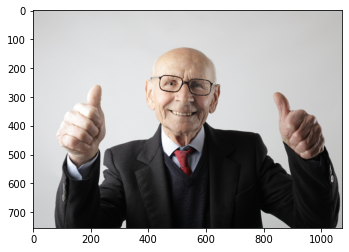

In [ ]:
#thumbs_img = cv2.imread('thumbsup.jpg')
thumbs_img = cv2.imread('thumbsup2.jpg')
#thumbs_img = cv2.imread('thumbsdown.jpg')
#thumbs_img = cv2.imread('face0.jpg')


h_org,w_org,temp = thumbs_img.shape
print(thumbs_img.shape)
reduce_factor = 6
thumbs_img = cv2.resize(thumbs_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
#thumbs_img = cv2.GaussianBlur(thumbs_img, (5,5), 0)
framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
plt.clf()
plt.imshow(framergb)
x , y, c = framergb.shape
print(framergb.shape)

In [ ]:
def calc_landmark_center(landmarks):
    ###for simplicity get average of landmarks and use this as center for a hand
    x = 0
    y = 0
    samples = len(landmarks)
    for lm in landmarks:
        x = x + lm[0]
        y = y + lm[1]
    x = int(x/samples)
    y = int(y/samples)
    return x,y

def get_thumb_orientation(landmarks,show_debug):
    ###return the orientation of the hand: true = thumbsup; false = thumbsdown
    max_y = 0
    min_y = 1000000
    samples = len(landmarks)
    for lm in landmarks:
        if lm[1] > max_y:
            max_y = lm[1]
        if lm[1] <= min_y:
            min_y = lm[1]
    
    #lm[4] #thumb landmark

    dist_top = max_y - landmarks[4][1]
    
    dist_bottom = min_y - landmarks[4][1]
    
    if dist_bottom == 0.0:
        orientation = True #thumbsup
        if show_debug:
            print("thumbsup")
    elif dist_top == 0.0:
        orientation = False #thumbsdown
        if show_debug:
            print("thumbsdown")
    
    if ((dist_bottom != 0.0) and (dist_top != 0.0)):
        valid = False
    else:
        valid = True
    
    
    
    if show_debug:
        print("hand landmark.y from %s to %s"%(min_y,max_y))
        print("thumb landmark: %s"%landmarks[4][1])
        print("distance top: %s"%dist_top)
        print("distance bottom: %s"%dist_bottom)
    #print(max_y,min_y)
    
    return orientation,valid

## process frame to detect hand landmarks 

In [ ]:
# Get hand landmark prediction

#process twice due to better results
counter = 0
while counter < 2:
    result = hands.process(framergb)
    className = ''
    # post process the result
    if result.multi_hand_landmarks:
        print("found hand landmarks")
        landmarks_pred = []
        landmarks_draw = []
        shape = thumbs_img.shape
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)
                landmarks_pred.append([lmx, lmy])
                landmarks_draw.append([lm.x * shape[1],lm.y * shape[0]])
                cv2.circle(thumbs_img,(int((lmx/x)*y), int((lmy/y)*x)),15,(255, 0, 0))              
            mpDraw.draw_landmarks(thumbs_img, handslms, mpHands.HAND_CONNECTIONS)
    else:
        print("no hand landmarks")
    counter = counter + 1
# Drawing landmarks on frames
#rx,ry = calc_landmark_center(landmarks_draw)
#thumb_up_down = get_thumb_orientation(landmarks_draw,False)
#print(rx,ry)
#_ = cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))

found hand landmarks
found hand landmarks


## calculate prediction based on landmarks with 1) model.predict and 2) distance

1/1 [==============================] - 0s 26ms/step
model prediction: thumbs up
landmark calculation: thumb_up
1/1 [==============================] - 0s 30ms/step
model prediction: fist
landmark calculation: thumb_up


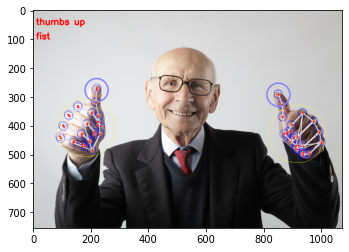

In [ ]:
# Predict gesture in Hand Gesture Recognition project
if result.multi_hand_landmarks:
    for i in range(len(landmarks_pred)//21):
        #predict hand class with model
        prediction = model.predict([landmarks_pred[i*21:(21+(i*21))]]) #problem with predict if more than one hand is detected
        #prediction = model.predict([landmarks_pred[0:21]])
        #--> landmarks sind dann doppelt so lang wie sie für eine hand sein müssten
        pred = prediction.flatten()
        classID = np.argmax(pred[0:len(pred)-1]) #ignore smile

        className = classNames[classID]
        print("model prediction: %s"%className)
        cv2.putText(thumbs_img, className, (10, (50+i*50)), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2, cv2.LINE_AA)


        #seperate thumb up from thumb down based on max y position
        thumb_up_down,valid_thumb_orientation = get_thumb_orientation(landmarks_draw[i*21:(21+(i*21))],False)
        if valid_thumb_orientation:
            if thumb_up_down:
                print("landmark calculation: thumb_up")
            else:
                print("landmark calculation: thumb_down")
            thumb_offset = 4
            cv2.circle(thumbs_img,(int(landmarks_draw[(i*21)+thumb_offset][0]),int(landmarks_draw[(i*21)+thumb_offset][1])),40,(255,128,128),4)


        #get average hand position for future usage
        rx,ry = calc_landmark_center(landmarks_draw[i*21:(21+(i*21))]) 
        cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))
    plt.clf()
    framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
    plt.imshow(framergb)
    #cv2.cvtColor(thumbs_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite("thumbs.jpg", thumbs_img)
else:
    print("no hand landmarks in img")

https://answers.opencv.org/question/24154/how-to-using-opencv-api-get-web-video-stream/

In [ ]:
#VideoCapture cap;
#cap.open(192.168.1.180/?action=stream?dummy=param.mjpg);

# Image Composition for gallery images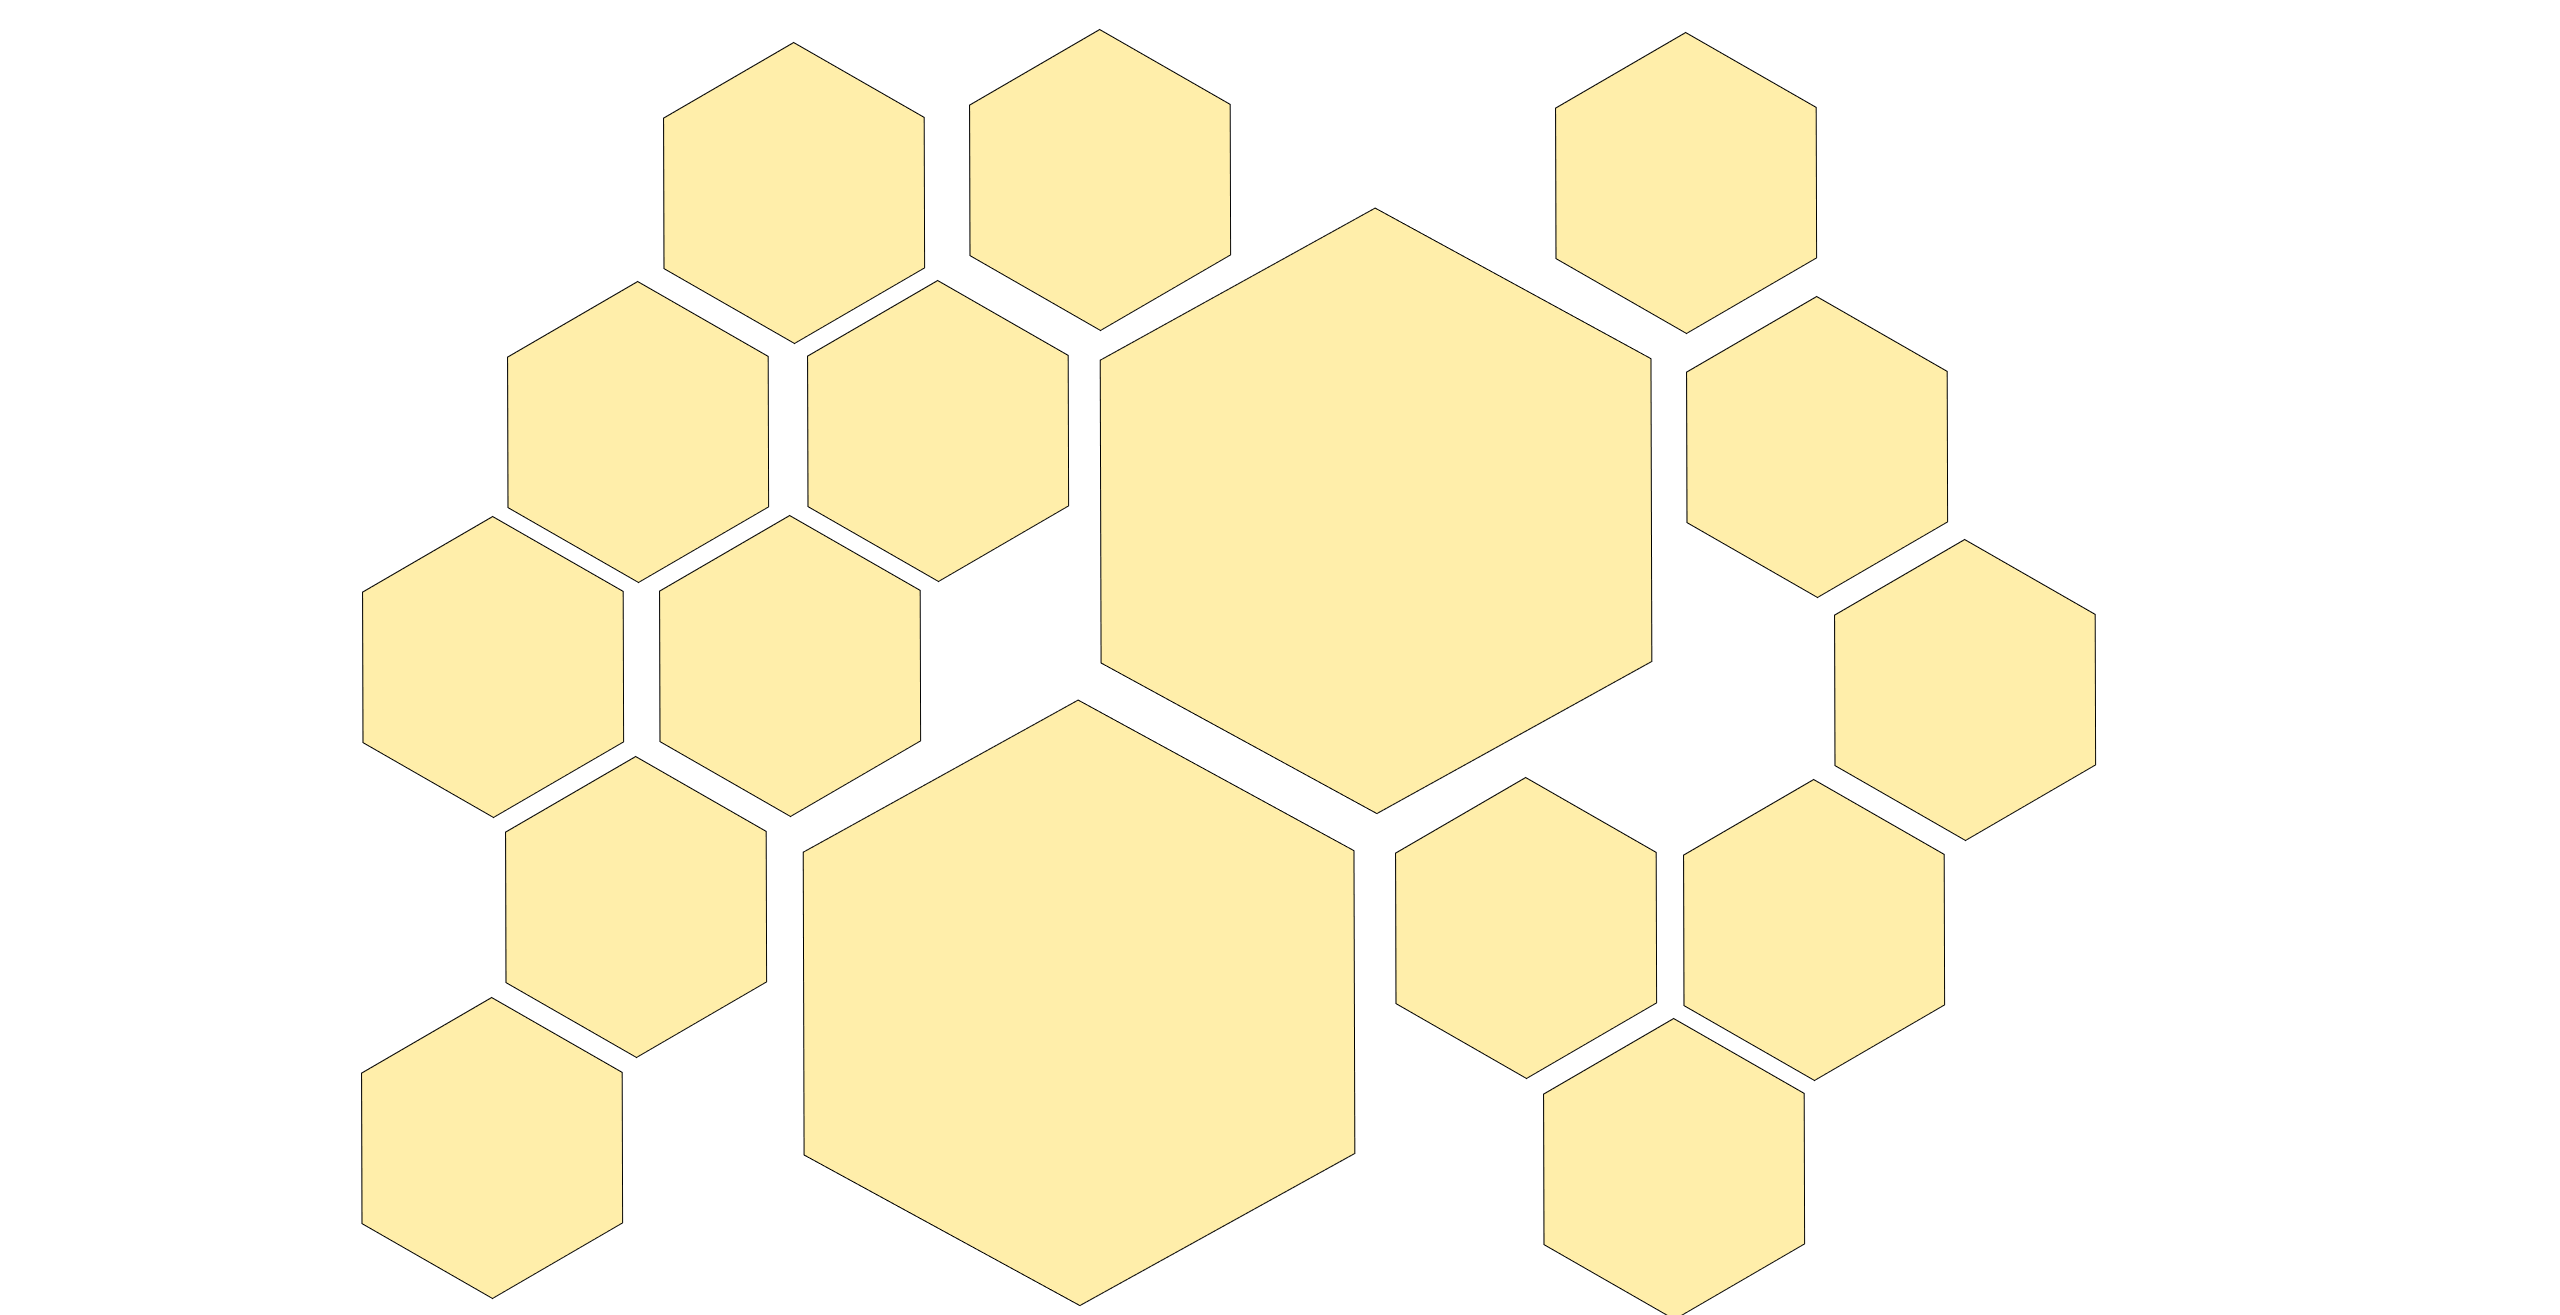

fill image with hexagonal face areas

In [3]:
import math
from PIL import Image, ImageDraw, ImageFilter, ImageOps
from PIL import ImagePath 

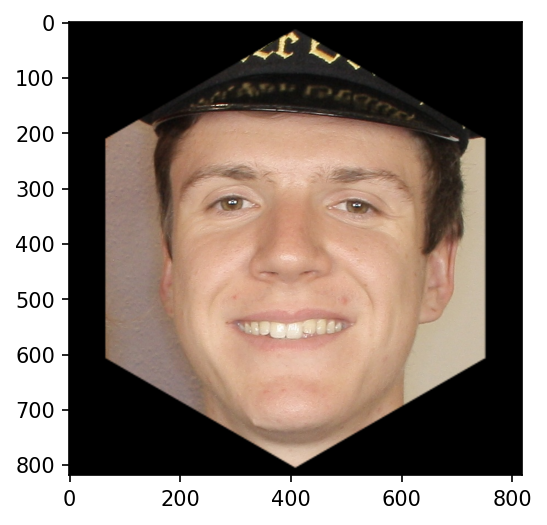

In [ ]:
#https://note.nkmk.me/en/python-pillow-composite/

#screen width 1920
#screen height 1080  
  



#img_face = Image.open('/content/drive/MyDrive/cvml-emb/face0.jpg')
img_face = Image.open('face1.jpg')
#img_background = Image.open('/content/drive/MyDrive/cvml-emb/test_gruppe.jpg').resize(img_face.size)
img_background = Image.open('background.jpg').resize(img_face.size)

img_background = Image.new(mode = "RGB", size = img_face.size,
                           color = (0, 0, 0))

#mask = Image.open('/content/drive/MyDrive/cvml-emb/hex.png').resize(img_face.size)
mask = Image.open('hex.png').resize(img_face.size)
#mask_blur = mask.filter(ImageFilter.GaussianBlur(10))
im = Image.composite(img_face, img_background, mask)
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(im)

In [10]:
!pip install Pillow==9.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 4.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


9.1.1


ValueError: bad transparency mask

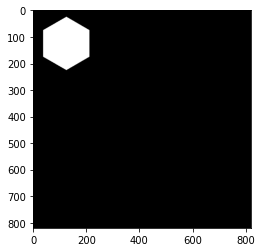

In [ ]:
#create mask shown in yellow sketch picture with size 1920,1080
#place face centers on centerpoints of bounding_circles
#apply mask

mask = Image.new(mode = "RGB", size = img_face.size, color = (0,0,0))
draw = ImageDraw.Draw(mask)
print(Image.__version__)
#regular_polygon(bounding_circle, n_sides, rotation=0, fill=None, outline=None)
#draw.rectangle()
draw.regular_polygon(bounding_circle=(125,125,100), n_sides=6, rotation=90, fill=(255,255,255))
plt.imshow(mask)

im = Image.composite(img_face, img_background, mask)
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(im)

In [ ]:
class HexPoint:
    def __init__(self, index, x,y,visible,size):
        self.index = index
        self.x = x
        self.y = y
        self.visible = visible
        self.size = size

def readHexFromCSV(filename):
    f = open(filename, 'r')
    hex_points = []
    lines = f.readlines()
    print("got %d lines from %s with header: "%(len(lines),filename))
    print(lines[0].split(";"))
    for line in lines:
        if not (line[0] == 'i'):
            line = line.strip().split(";")
            #print(line[5])
            hex_points = hex_points + [(line[0],line[1],line[2],line[3],line[4],line[5])]
    #print(hex_points)
    return hex_points

In [ ]:
hex_points_csv = readHexFromCSV('hex_locations.csv')
hex_points_csv[0]

got 37 lines from hex_locations.csv with header: 
['index', 'x', 'y', 'visible', 'size', 'used\n']


('0', '183', '183', '1', '135', '0')

In [ ]:
#7 per row
#5 rows
visible_hex = [1,1,1,1,0,1,1,
               1,1,1,0,0,1,0,
               1,1,1,0,0,0,1,
               1,1,1,1,1,1,0,
               0,0,0,0,0,0,0]
print(visible_hex)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


58.457
141.93366666666665
dy 224
dx 129


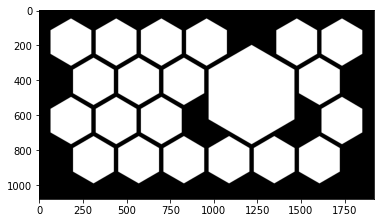

In [ ]:
screen_size = (1920,1080)
hex_dia = 135 #length of the hexagon (circle creating it)
hex_internal_h = round((hex_dia/2)*math.sin(math.pi/3),3)
print(hex_internal_h)
padding = 250

#calculate horizontal spacing
hex_per_row = 7
total_space_between_hex = screen_size[0] - padding - 2*hex_internal_h*(hex_per_row)
hex_outer_distance = total_space_between_hex/(hex_per_row-1) #distance between parallel sides --> calculate based on screen size not fixed
print(hex_outer_distance)

hex_horizontal_distance = 2*hex_internal_h+hex_outer_distance

hex_angled_dx = hex_horizontal_distance *math.sin(math.pi/6)
hex_angled_dy = hex_horizontal_distance *math.cos(math.pi/6)
print("dy %d"%hex_angled_dy)
print("dx %d"%hex_angled_dx)
#columns = int((base_width - hex_outer_distance)/hex_dia) + 2
#print(columns)
x_off = padding/2 + hex_internal_h
y_off = padding/2 + hex_internal_h
rows = 5
hex_points = np.empty(hex_per_row*rows, dtype=object)
for row in range(rows):
  new_y_off = y_off + (row*hex_angled_dy)
  
  #print(row%2)
  if (row%2)==0:
    new_x_off = x_off
  else:
    new_x_off = x_off + hex_angled_dx
  for column in range(hex_per_row):
    new_x = int(new_x_off + (column*hex_horizontal_distance))
    new_y = new_y_off
    hex_points[(row*hex_per_row) + column] = (new_x,new_y) #last item is showing_index; w

#print(hex_points)

mask = Image.new(mode="RGB",size = screen_size, color = (0,0,0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)

f = open('hex_locations.csv', 'w+')
f.write('index;x;y;visible;size;used\n')
for index,point in enumerate(hex_points):
    f.write('%d;%d;%d;%d;%d;%d\n'%(index,point[0],point[1],visible_hex[index],hex_dia,0))
    if visible_hex[index]==1:
        draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))

big_one = (hex_points[9][0] + int((hex_points[12][0] - hex_points[9][0])/2),(hex_points[9][1] + 75))       
draw.regular_polygon(bounding_circle=(big_one,2.1*hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
f.write('%d;%d;%d;%d;%d;%d\n'%(1000,big_one[0],big_one[1],visible_hex[index],2.1*hex_dia,0))
f.close()
plt.imshow(mask)
_ = mask.save("mask.jpg")


#mask is not used to generate collage --> only the points and size from hexpoints is used to draw onto the background

TODO: LGS mit Abstand horizontal und vertikal löst noch nicht für die hexagons die richtige distanz aus. Siehe skizze (analog, papier)


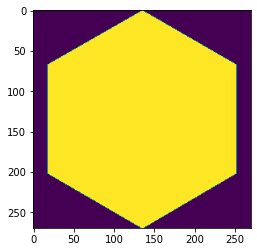

In [ ]:
masksize = int(2*hex_dia)
#background = Image.open('background.jpg').resize(screen_size).convert("RGB")
img_face = Image.open('face1.jpg').resize((masksize,masksize)).convert("RGB")
mask = Image.new(mode="L",size = (masksize,masksize), color = (0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)

draw.regular_polygon(bounding_circle=((masksize/2,masksize/2),hex_dia), n_sides=6, rotation=90, fill=(255))
plt.imshow(mask)
#background.paste(img_face,(int(hex_points[0][0]),int(hex_points[0][1])),mask)
#for point in hex_points:
#  draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
#im = Image.composite(img_face, img_background, mask)
#plt.imshow(background)

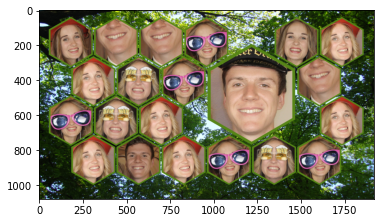

In [ ]:
import os
import random
#import dircache

masksize = int(2*hex_dia)
background = Image.open('background.jpg').resize(screen_size).convert("RGB")
img_face = Image.open('face1.jpg').resize((masksize,masksize)).convert("RGB")


mask = Image.new(mode="L",size = (masksize,masksize), color = (0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)
draw.regular_polygon(bounding_circle=((masksize/2,masksize/2),hex_dia), n_sides=6, rotation=90, fill=(255))

f_outl = 1.07
outline_mask = Image.new(mode="L",size = (int(f_outl*masksize),int(f_outl*masksize)), color = (0)) #(mode = "L", 
outline_draw = ImageDraw.Draw(outline_mask)
outline_draw.regular_polygon(bounding_circle=((int((f_outl*masksize)/2),int((f_outl*masksize)/2)),f_outl*hex_dia), n_sides=6, rotation=90, fill=(255))
img_outline = Image.open('green.png').resize((int(f_outl*masksize),int(f_outl*masksize))).convert("RGB")

#here only face classified as true face
big_mask = Image.new(mode="L",size = (2*masksize,2*masksize), color = (0)) #(mode = "L", 
big_draw = ImageDraw.Draw(big_mask)
big_draw.regular_polygon(bounding_circle=((masksize,masksize),2*hex_dia), n_sides=6, rotation=90, fill=(255))
big_img_face = Image.open('face1.jpg').resize((2*masksize,2*masksize)).convert("RGB") 

big_outline_mask = Image.new(mode="L",size = (int(f_outl*2*masksize),int(f_outl*2*masksize)), color = (0)) #(mode = "L", 
big_outline_draw = ImageDraw.Draw(big_outline_mask)
big_outline_draw.regular_polygon(bounding_circle=((int((f_outl*2*masksize)/2),int((f_outl*2*masksize)/2)),f_outl*2*hex_dia), n_sides=6, rotation=90, fill=(255))
big_img_outline = Image.open('green.png').resize((int(f_outl*2*masksize),int(f_outl*2*masksize))).convert("RGB")

#plt.imshow(outline_mask)


#plt.imshow(mask)
for index,point in enumerate(hex_points):
    #print(point)
    if visible_hex[index]==1:
        filename = random.choice(glob.glob("faces/*jpg")) 
        img_face = Image.open(filename).resize((masksize,masksize)).convert("RGB")
        #draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
        background.paste(img_outline,(int(point[0]-f_outl*hex_dia),int(point[1]-f_outl*hex_dia)),outline_mask)
        background.paste(img_face,(int(point[0]-hex_dia),int(point[1]-hex_dia)),mask)

background.paste(big_img_outline,(int(big_one[0]-f_outl*2*hex_dia),int(big_one[1]-f_outl*2*hex_dia)),big_outline_mask)
background.paste(big_img_face,(int(big_one[0]-2*hex_dia),int(big_one[1]-2*hex_dia)),big_mask)

#  draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
#im = Image.composite(img_face, img_background, mask)

plt.imshow(background)

#cv2.imwrite("collage.jpg", background)
background = background.save("collage.jpg")

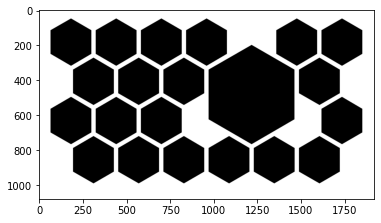

In [ ]:
#mask = mask.convert('RGB')
mask_invert = ImageOps.invert(mask)
plt.imshow(mask_invert)
mask_invert = mask_invert.save("mask_invert.jpg")

Ziel dieser Aktion ist es, mittels einer weiteren "Maske" nur die relevanten Sechsecke auszuwählen wie in dem skizzierten Aufbau (siehe Bild jpg)
z.B. np array mit 0 für unsichtbar; 1 für sichtbar für jede Position
andere Variante: klasse hexagon erstellen --> position x, y, sichtbarkeit, radius, orientierung (Drehung)

Anschließend erneutes Hinzufügen von größeren Sechsecken, die genau in das Muster passen --> Denkbar für Titel der Bilder oder für ausgewählte Bilder (durch Gesten klassifizierte Bilder sind auf jeden Fall gut --> können hier groß dargestellt werden)

Auswahl von Bildern:
Welche Bilder werden für die Darstellung im Sechseck ausgewählt?
Idee: klassifizierung mit thumbs up / thumbs down


Refactoring: Sechseck als Klasse

466.672
[(960, 700), (1193.336, 295.85019276510843), (1426.672, 700), (493.328, 700), (726.664, 295.85019276510843)]


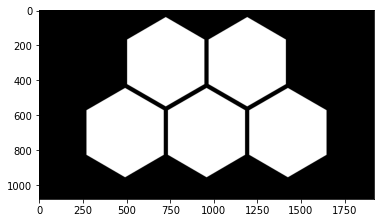

In [52]:
#4 der als "gut" klassifizierten Bilder als sechsecke darstellen

screen_size = (1920,1080)
hex_dia = 255 #length of the hexagon (circle creating it)
hex_internal_h = round((hex_dia/2)*math.sin(math.pi/3),3)

#calculate horizontal spacing
hex_outer_distance = 25
hex_horizontal_distance = 4*hex_internal_h+hex_outer_distance
print(hex_horizontal_distance)
#hex_angled_dx = hex_horizontal_distance / 2
hex_angled_dy = hex_horizontal_distance *math.sin(math.pi/3)
big_points = [(960,700)]

big_points = big_points + [(big_points[0][0]+hex_horizontal_distance/2,big_points[0][1]-hex_angled_dy)]
big_points = big_points + [(big_points[0][0]+hex_horizontal_distance,big_points[0][1])]
big_points = big_points + [(big_points[0][0]-hex_horizontal_distance,big_points[0][1])]
big_points = big_points + [(big_points[0][0]-hex_horizontal_distance/2,big_points[0][1]-hex_angled_dy)]

f = open('big_hex_locations.csv', 'w+')
f.write('index;x;y;visible;size;used\n')
print(big_points)
mask = Image.new(mode="RGB",size = screen_size, color = (0,0,0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)
for index,point in enumerate(big_points):
  draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
  f.write('%d;%d;%d;%d;%d;%d\n'%(index,point[0],point[1],1,hex_dia,0))
f.close()
plt.imshow(mask)